<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/exercises/E11-PatentCitationNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Patent Citation Network

U.S. patent dataset is maintained by the [National Bureau of Economic Research](http://www.nber.org/). The data set spans 37 years (January 1, 1963 to December 30, 1999), and includes all the utility patents granted during that period, totaling 3,923,922 patents. The citation graph includes all citations made by patents granted between 1975 and 1999, totaling 16,522,438 citations. For the patents dataset there are 1,803,511 nodes for which we have no information about their citations (we only have the in-links).

The data was originally released by [NBER](http://www.nber.org/patents/). The dataset can be found at this link: [Stanford Patent Citation Network](https://snap.stanford.edu/data/cit-Patents.html)

## Import Packages

In [1]:
!pip install node2vec

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

## Import data

In [2]:
patent = pd.read_csv(
    "http://snap.stanford.edu/data/cit-Patents.txt.gz",
    compression="gzip",
    sep="\t",
    names=["start_node", "end_node"],
    skiprows=5
)

In [4]:
patent.head()

,start_node,end_node
0,3858241,1324234
1,3858241,3398406
2,3858241,3557384
3,3858241,3634889
4,3858242,1515701


In [5]:
patent.shape

(16518947, 2)

## Build Recommendation System

build a recommendation system based on Node2Vec with the patent information, remember to do a descriptive analysis and apply visualizations.

Also, remember that when making a recommendation about which patent should be associated with another, make a visualization of the recommendation.

In [4]:
G = nx.from_pandas_edgelist(patent, 'start_node', 'end_node', create_using=nx.DiGraph())

In [5]:
#Iniciamos mirando número de nodos y edges de la base
num_nodes = G.number_of_nodes()

num_edges = G.number_of_edges()

print("Total nodos:", num_nodes)
print("Total edges:", num_edges)

Total nodos: 3774767
Total edges: 16518947


In [3]:
#Dado el peso de la base, no fue posible realizar el ejercicio, se redujo al 10% y tampoco se logró, se deja al 1%
sample_size = int(len(patent) * 0.001)

df = patent.sample(n=sample_size, random_state=42)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16518 entries, 8222368 to 1102014
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   start_node  16518 non-null  int64
 1   end_node    16518 non-null  int64
dtypes: int64(2)
memory usage: 387.1 KB
None


In [4]:
df.head()

,start_node,end_node
8222368,5149225,3730037
346266,3932042,3836261
4965969,4716067,3989876
8166356,5142358,5001632
10832526,5451128,5049011


In [5]:
df.shape

(16518, 2)

In [6]:
G_new = nx.from_pandas_edgelist(df, 'start_node', 'end_node', create_using=nx.DiGraph())

In [7]:
#Nodos y edges luego de la reducción
num_nodes = G_new.number_of_nodes()

num_edges = G_new.number_of_edges()

print("Total nodos:", num_nodes)
print("Total edges:", num_edges)

Total nodos: 32703
Total edges: 16518


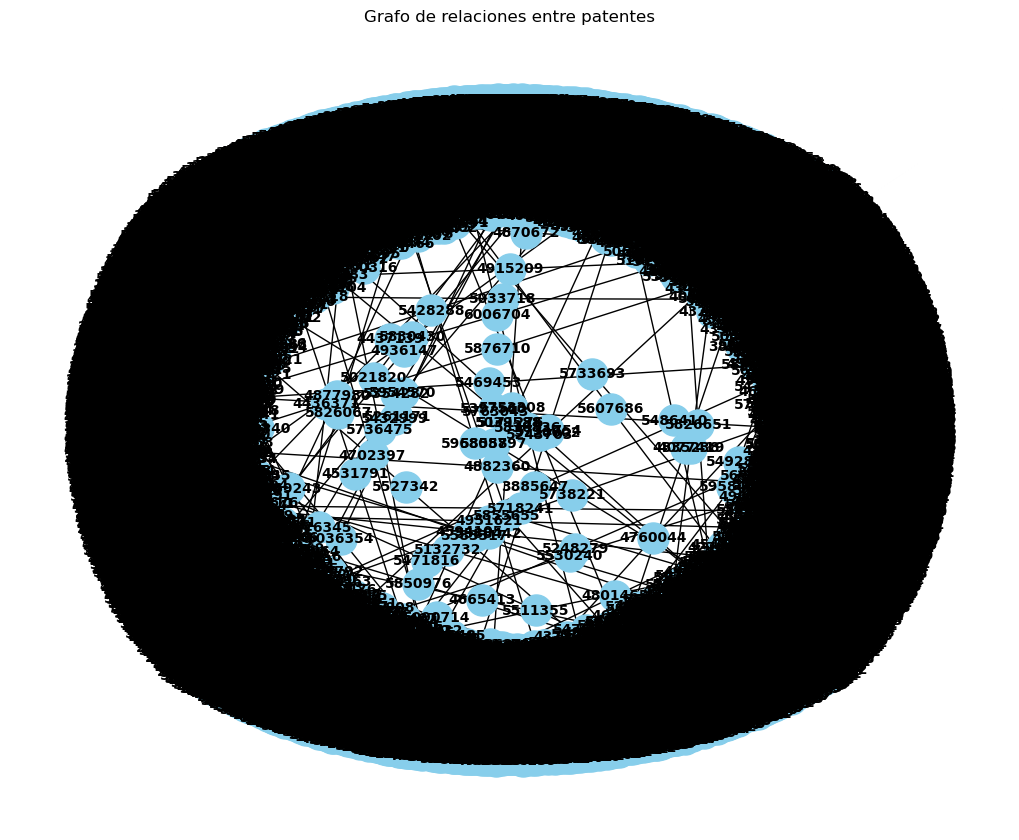

In [34]:
#Ahora, visualizamos el grafo
plt.figure(figsize=(10, 8))
nx.draw(G_new, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=10)
plt.title('Grafo de relaciones entre patentes')
plt.show()

In [6]:
# Calcular la centralidad de grado de los nodos
degree_centrality = nx.degree_centrality(G)
degree_centrality

{3858241: 1.0596683344080136e-06,
 1324234: 5.298341672040068e-07,
 3398406: 3.1790050032240407e-06,
 3557384: 3.443922086826044e-06,
 3634889: 2.3842537524180304e-06,
 3858242: 4.238673337632054e-06,
 1515701: 2.649170836020034e-07,
 3319261: 7.947512508060102e-07,
 3668705: 2.119336668816027e-06,
 3707004: 5.033424588438064e-06,
 3858243: 2.3842537524180304e-06,
 2949611: 1.0596683344080136e-06,
 3146465: 3.7088391704280476e-06,
 3156927: 1.3245854180100168e-06,
 3221341: 1.0596683344080136e-06,
 3574238: 1.8544195852140238e-06,
 3681785: 2.119336668816027e-06,
 3684611: 1.5895025016120203e-06,
 3858244: 2.119336668816027e-06,
 14040: 2.649170836020034e-07,
 17445: 2.649170836020034e-07,
 2211676: 2.649170836020034e-07,
 2635670: 5.298341672040068e-07,
 2838924: 5.298341672040068e-07,
 2912700: 2.649170836020034e-07,
 3858245: 4.768507504836061e-06,
 2072303: 7.947512508060102e-07,
 3176316: 7.682595424458098e-06,
 3553737: 3.973756254030051e-06,
 3608095: 5.033424588438064e-06,
 362

In [8]:
from node2vec import Node2Vec

In [9]:
# Crear un objeto Node2Vec
node2vec = Node2Vec(G_new, dimensions=64, walk_length=30, num_walks=10, workers=2)

Computing transition probabilities:   0%|          | 0/32703 [00:00<?, ?it/s]

In [10]:
# Entrenar el modelo Node2Vec
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [11]:
def recommend(patent):
    patent_id = str(patent)  
    for id in model.wv.most_similar(patent_id)[:5]:
        similar_patent = id[0]
        similarity_score = id[1]
        print(f'Patente: {similar_patent}, Similitud: {similarity_score:.2f}')

In [12]:
recommend('5149225')

Patente: 4887330, Similitud: 0.47
Patente: 3469976, Similitud: 0.46
Patente: 5417263, Similitud: 0.44
Patente: 3885869, Similitud: 0.43
Patente: 3760883, Similitud: 0.43


In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [14]:
# Preprocess word vectors and label
nodes_wv = np.array([model.wv.get_vector(str(i)) for i in model.wv.index_to_key])

In [15]:
# Aplicar PCA para reducir la dimensionalidad y lograr entrenar tsne ya que en el estado actual no se puede correr
pca = PCA(n_components=20)  
nodes_pca = pca.fit_transform(nodes_wv)

In [20]:
tsne = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=0).fit_transform(nodes_pca)

c:\Users\natal\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


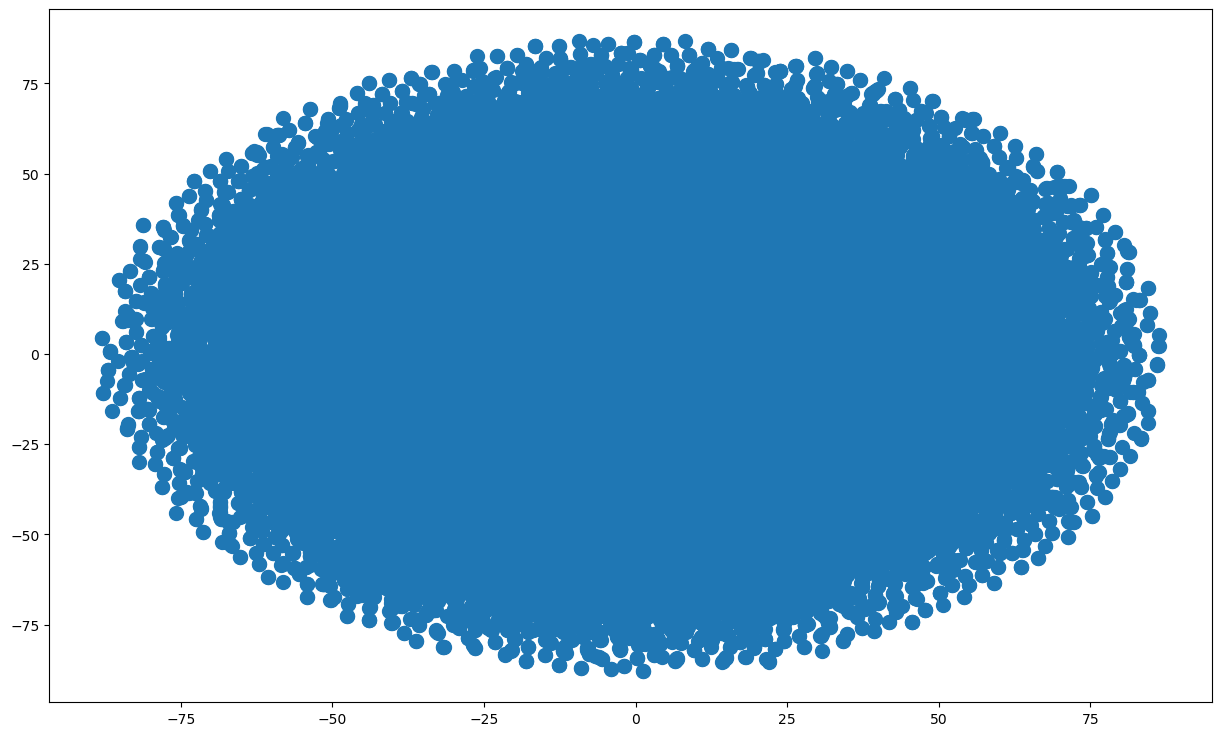

In [21]:
# Plot TSNE
plt.figure(figsize=(15, 9))
plt.scatter(tsne[:, 0], tsne[:, 1], s=100)
plt.show()

In [31]:
def create_labels(patente):
  labels = []
  for node in G_new.nodes:
      label = [value for key, value in G_new.nodes[node].items()]
      labels.append(1 if label == [patente] else 0)
  return labels

In [32]:
def plot_labels(patente):
  # Train TSNE
  tsne = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=0).fit_transform(nodes_pca)

  # Plot TSNE
  plt.figure(figsize=(15, 9))
  plt.scatter(tsne[:, 0], tsne[:, 1], s=100, c=create_labels(patente), cmap="coolwarm")
  plt.show()

c:\Users\natal\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


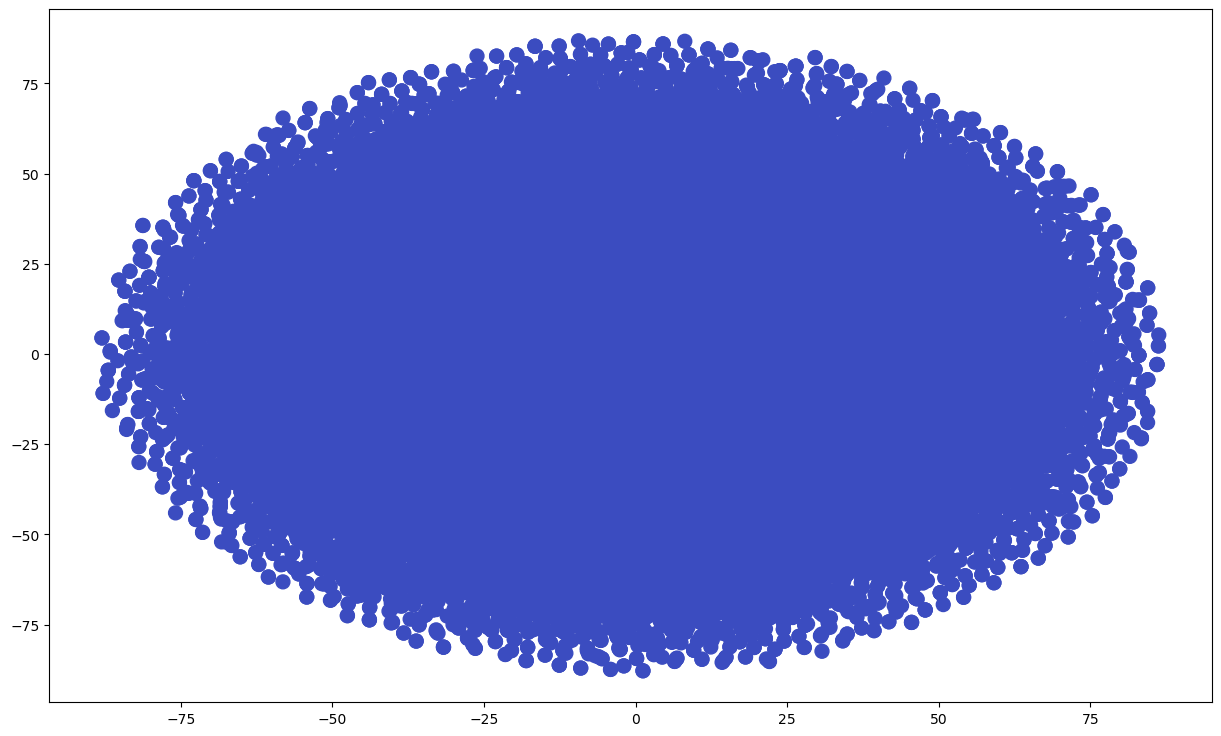

In [33]:
plot_labels('5149225')